We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Data" data-toc-modified-id="Importing-Libraries-and-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries and Data</a></span><ul class="toc-item"><li><span><a href="#Libraries-and-Settings" data-toc-modified-id="Libraries-and-Settings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries and Settings</a></span></li><li><span><a href="#Importing-Data-and-Overview" data-toc-modified-id="Importing-Data-and-Overview-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing Data and Overview</a></span><ul class="toc-item"><li><span><a href="#Explore-price" data-toc-modified-id="Explore-price-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Explore price</a></span></li><li><span><a href="#Examine-missing-values-for-all-features" data-toc-modified-id="Examine-missing-values-for-all-features-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Examine missing values for all features</a></span></li></ul></li></ul></li><li><span><a href="#Data-Preprocessing-and-Feature-Engineering" data-toc-modified-id="Data-Preprocessing-and-Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing and Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Categorical Features</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#Building-Model" data-toc-modified-id="Building-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building Model</a></span><ul class="toc-item"><li><span><a href="#Preparing-Data" data-toc-modified-id="Preparing-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing Data</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Tree-Based-Regression" data-toc-modified-id="Tree-Based-Regression-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Tree-Based Regression</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#About-the-Model" data-toc-modified-id="About-the-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>About the Model</a></span></li><li><span><a href="#About-the-Code" data-toc-modified-id="About-the-Code-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>About the Code</a></span></li><li><span><a href="#Limitations-to-be-Improved" data-toc-modified-id="Limitations-to-be-Improved-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Limitations to be Improved</a></span></li></ul></li></ul></div>

# Importing Libraries and Data

## Libraries and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer, PolynomialFeatures
from xgboost import XGBRegressor

In [2]:
import importlib

In [17]:
import utils
importlib.reload(utils)
from utils import print_na, print_outlier, plot_price_dist, plot_price_trends, plot_price_seasonality, \
FeatureSelector, numeric_transformer, freq_transformer, dummy_transformer, ordinal_transformer, price_to_num, \
plot_numeric, plot_pca_scree, model_tuning, model_loss, plot_search_results

In [4]:
import warnings
random.seed(42)
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

## Importing Data and Overview

In [5]:
df = pd.read_csv('../data/sales.csv', parse_dates=['purchase_date'])
df.dropna(subset=['price'], inplace=True)
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,2008-12-19,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,1997-09-10,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,2001-09-05,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,2016-12-23,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,2000-01-12,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cost           2211 non-null   object        
 1   price          3186 non-null   object        
 2   weight         3183 non-null   object        
 3   purchase_date  3186 non-null   datetime64[ns]
 4   product_type   3186 non-null   object        
 5   product_level  3186 non-null   object        
 6   maker          2365 non-null   object        
 7   ingredient     2932 non-null   object        
 8   height         3186 non-null   object        
 9   width          3183 non-null   object        
 10  depth          3183 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 298.7+ KB


### Explore price

In [7]:
df['price'] = price_to_num(df['price'])

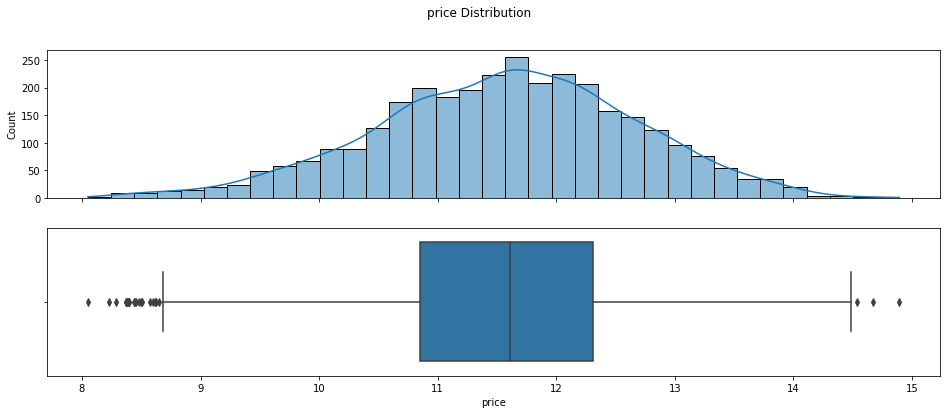

In [8]:
plot_price_dist(df['price'].map(np.log))

***Observations on Distribution***  
1. The distribution of price is so skewed that we need to apply log-transform to remove the skewness.  
2. After log-transform, the distribution of price is similar to normal distribution.
3. There are more outliers on the left side.

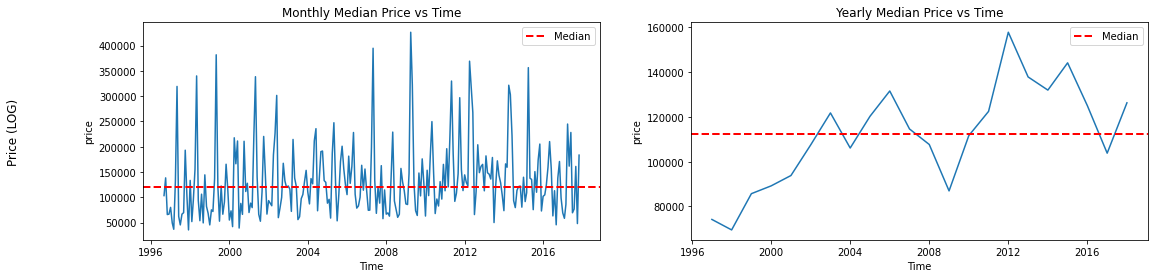

In [9]:
plot_price_trends(df)

***Observations on Trend***  
1. The data has a time span of over 20 years, from 1996 to 2018  
2. The price median is around $110,000
3. The price fluctuates a lot during the period 
4. Price on average is higher in recent years

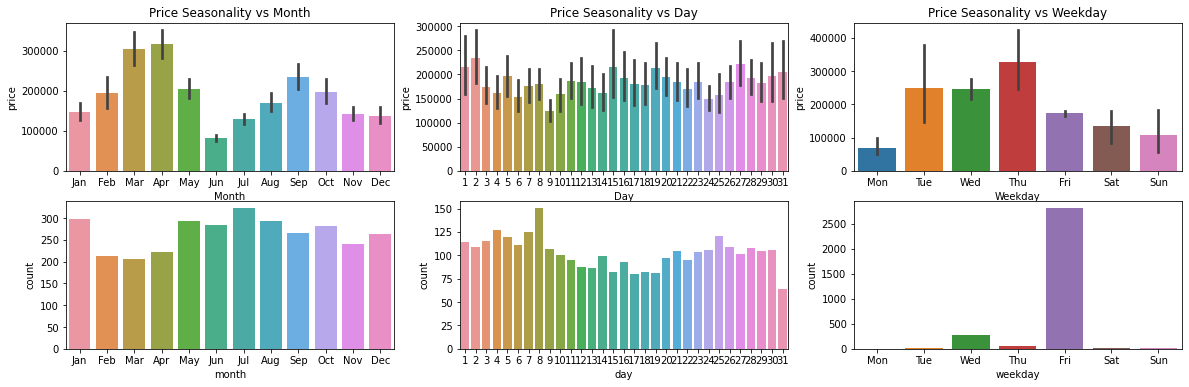

In [20]:
plot_price_seasonality(df)

***Observations on Seasonality***  
1. Price fluctuates within a year. Price is lowest in June, and highest in April.
2. Price exihbits some fluctuation within a week, but not too severe.
3. Most purchases occurred on Friday, and prices on Friday are quite stable.

### Examine missing values for all features

In [11]:
print_na(df)

cost has 975 missing values: 30.603%%
price has no missing values
weight has 3 missing values: 0.094%%
purchase_date has no missing values
product_type has no missing values
product_level has no missing values
maker has 821 missing values: 25.769%%
ingredient has 254 missing values: 7.972%%
height has no missing values
width has 3 missing values: 0.094%%
depth has 3 missing values: 0.094%%
month has no missing values
day has no missing values
weekday has no missing values


# Data Preprocessing and Feature Engineering

## Exploratory Data Analysis
### Numerical Features
***Data to visulize***  
* Histogram  
* Relation with other numerical features and price

In [8]:
numeric_features = ['cost', 'weight', 'height', 'width', 'depth', 'purchase_date']
num_trf = Pipeline(steps=[
    ('num_selector', FeatureSelector(numeric_features)),
    ('num_trf', numeric_transformer())
])
df_numeric = num_trf.transform(df)
df_numeric['price'] = df['price']

In [13]:
df_numeric.describe()

,cost,weight,height,width,depth,volumn,year,month,day,weekday,price
count,2211.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3186.000000,3186.000000,3186.000000,3186.000000,3.186000e+03
mean,169019.448213,3072.208294,262.858624,99.888470,26.181904,682806.055294,2006.871626,6.600753,15.437853,3.793785,1.823176e+05
std,145428.899397,179.103676,27.057638,5.535878,1.479557,40497.194709,6.008380,3.392029,9.121992,0.639249,2.205118e+05
min,3000.000000,2630.000000,170.000000,83.000000,22.000000,585600.000000,1996.000000,1.000000,1.000000,0.000000,3.131000e+03
25%,66000.000000,2950.000000,245.000000,96.000000,25.000000,653796.000000,2002.000000,4.000000,7.000000,4.000000,5.154075e+04
50%,122000.000000,3040.000000,262.000000,99.000000,26.000000,676575.000000,2007.000000,7.000000,15.000000,4.000000,1.105225e+05
75%,229500.000000,3170.000000,281.000000,103.000000,27.000000,704995.000000,2012.000000,9.000000,24.000000,4.000000,2.226220e+05
max,945000.000000,4120.000000,350.000000,129.000000,34.000000,919772.000000,2017.000000,12.000000,31.000000,6.000000,2.945329e+06


In [14]:
print_outlier(df_numeric)

cost has 98 outliers: 4.432%%
weight has 79 outliers: 2.482%%
height has 23 outliers: 0.723%%
width has 48 outliers: 1.508%%
depth has 25 outliers: 0.785%%
volumn has 77 outliers: 2.419%%
year has 0 outliers: 0.000%%
month has 0 outliers: 0.000%%
day has 0 outliers: 0.000%%
weekday has 368 outliers: 11.551%%
price has 246 outliers: 7.721%%


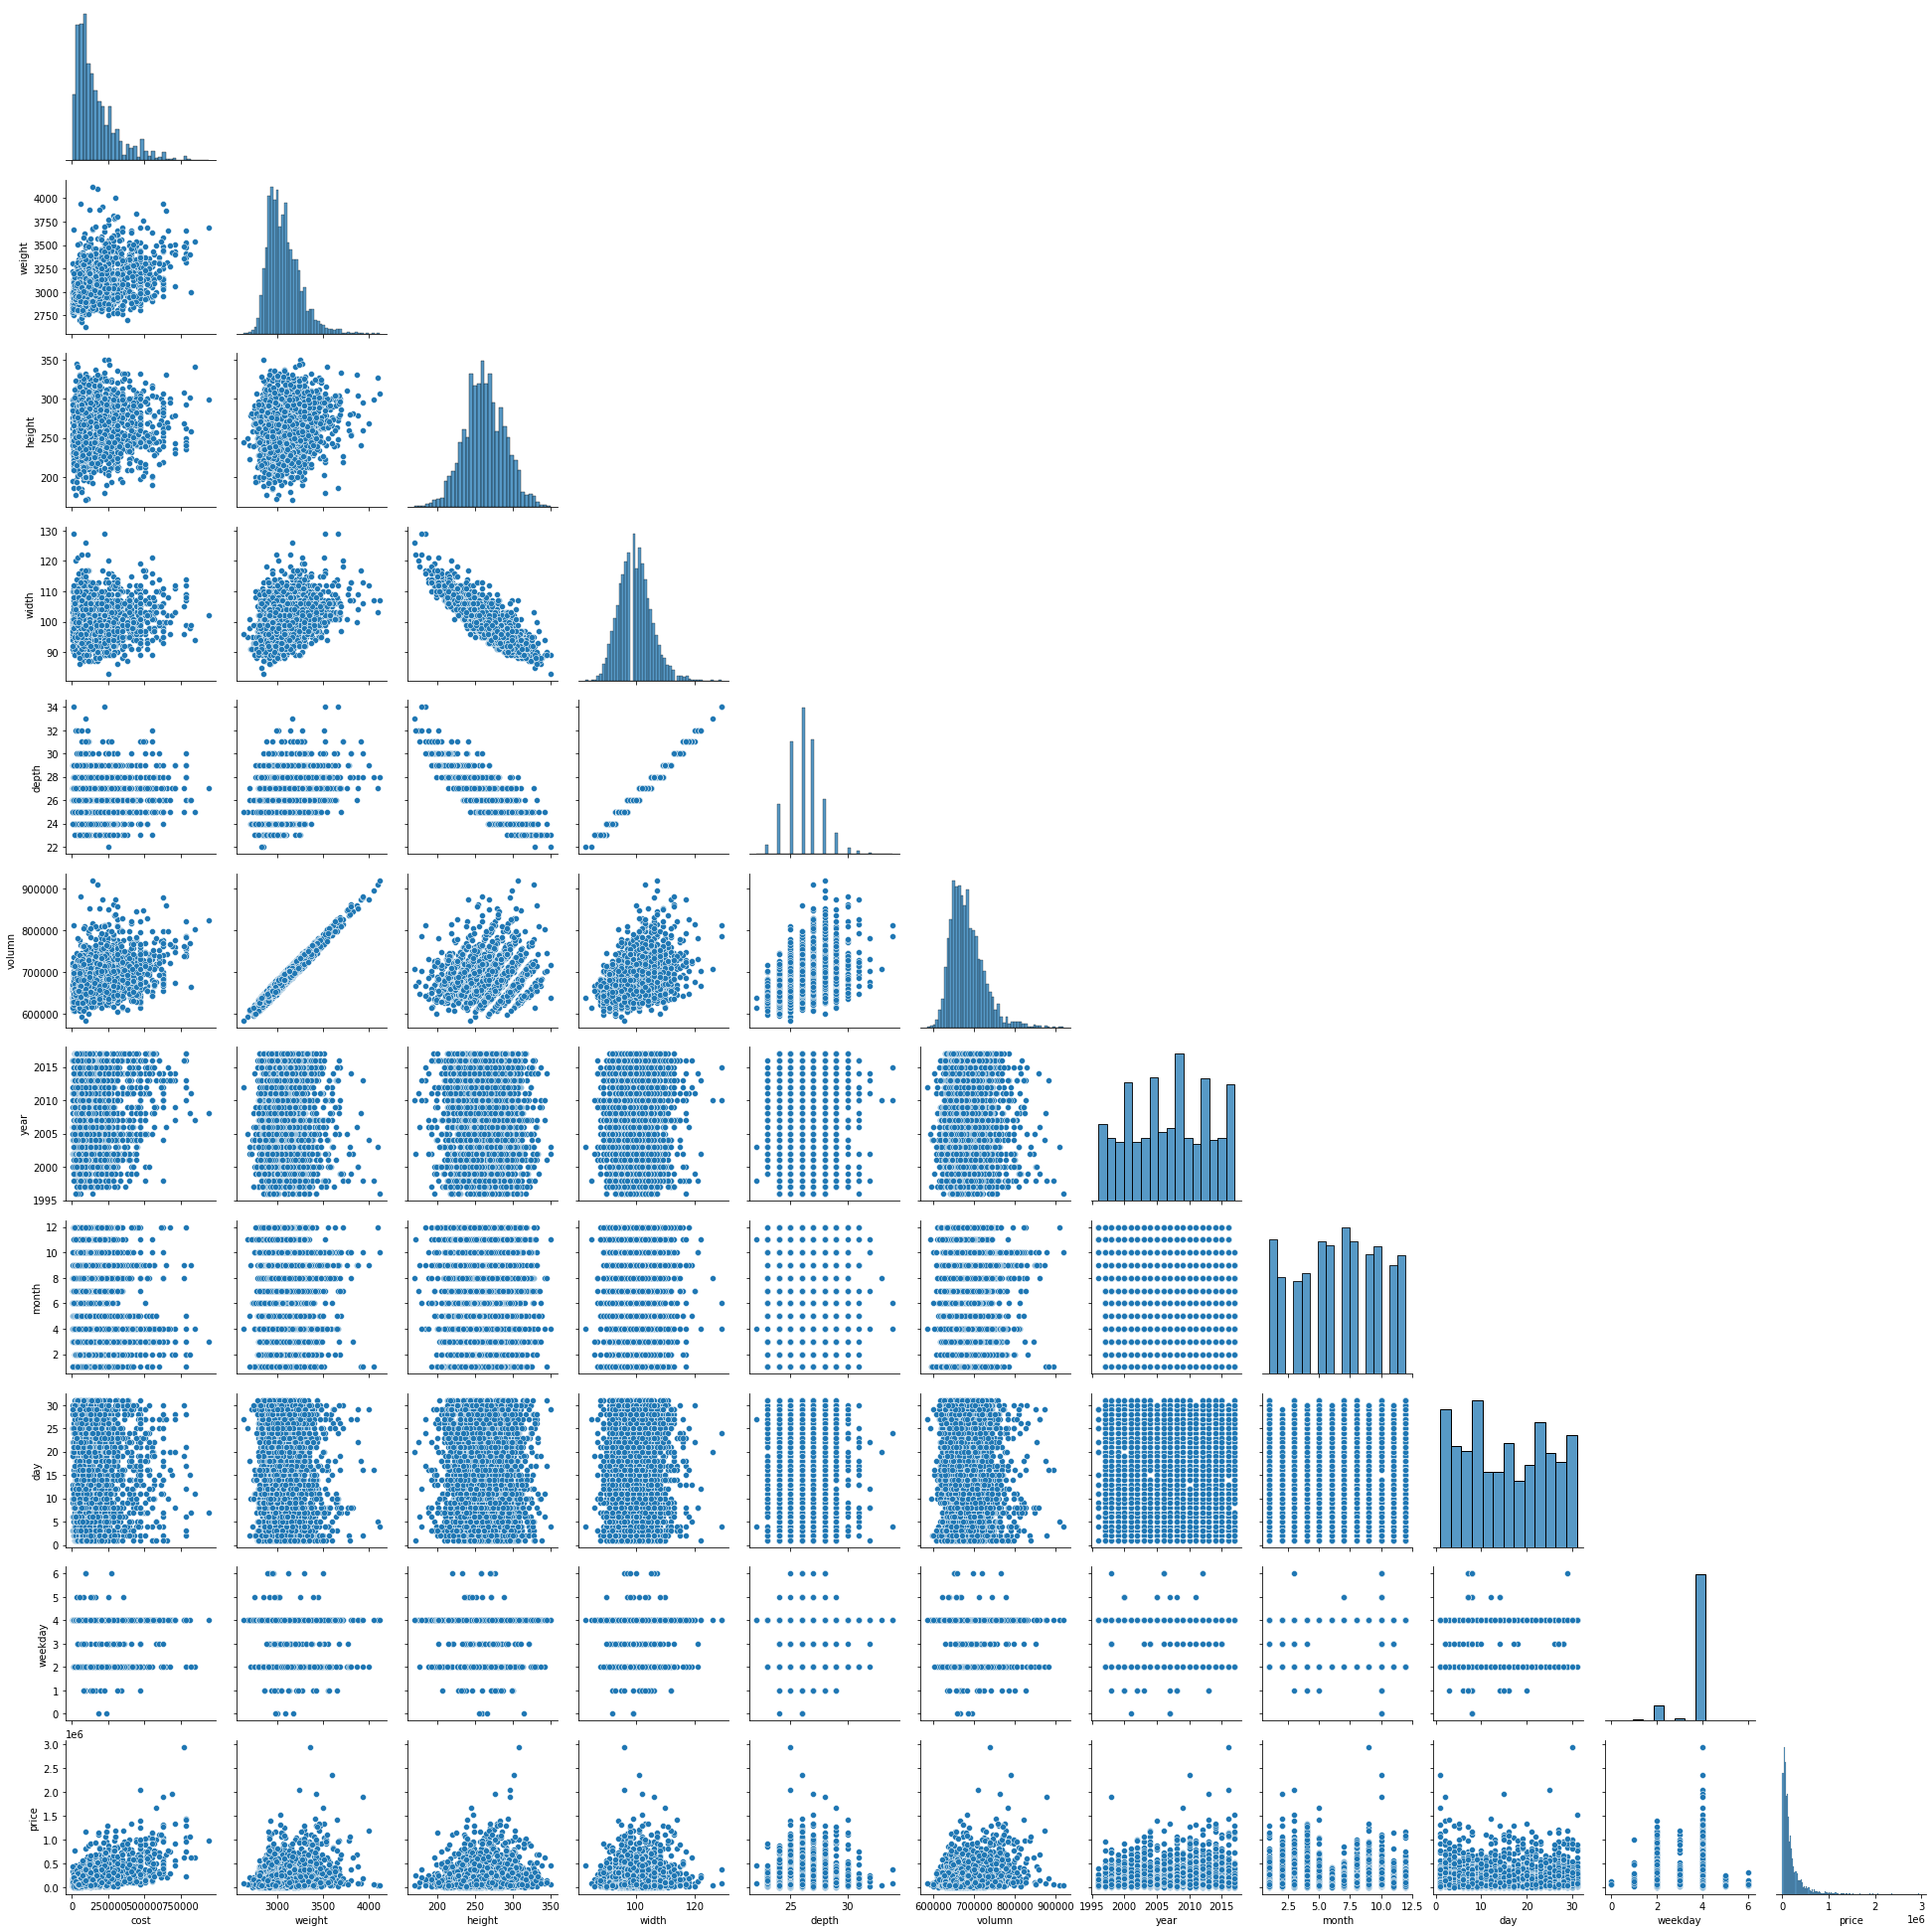

In [15]:
sns.pairplot(df_numeric, corner=True)

***Observations***  
Price is most likely to be related with cost

### Categorical Features
***Data Summarize***  
* number of unique levels  

In [16]:
categorical_features = ['product_type', 'product_level', 'maker', 'ingredient']
for col in categorical_features:
    print(f"{df[col].str.split(',').explode().nunique()} unique levels in {col}")

23 unique levels in product_type
5 unique levels in product_level
888 unique levels in maker
2035 unique levels in ingredient


***Observations***  
* product_level is ordinal data, need to examine whether the order relates to price  
* maker and ingredient have too many unique levels, need to encode them so that not many dimensions in the model
* product_type has moderate number of unique levels, still need to explore whether we can reduce the dimensions

***Data Visualization***  
* Histogram for level frequency
* Relation between level frequency and price
* Price distribution of most frequent category levels

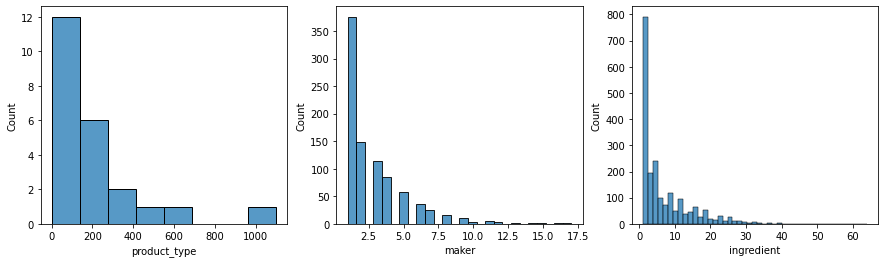

In [17]:
# value_counts distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(['product_type', 'maker', 'ingredient']):
    freq = df[col].str.split(',').explode().value_counts()
    sns.histplot(data=freq, ax=axes[i])

***Observations***  
* It seems we can use frequency to represent the maker and ingredient, and product_type

In [14]:
freq_feats = ['min_freq', 'max_freq', 'num_items']
freq_trf = freq_transformer(freq_feats)

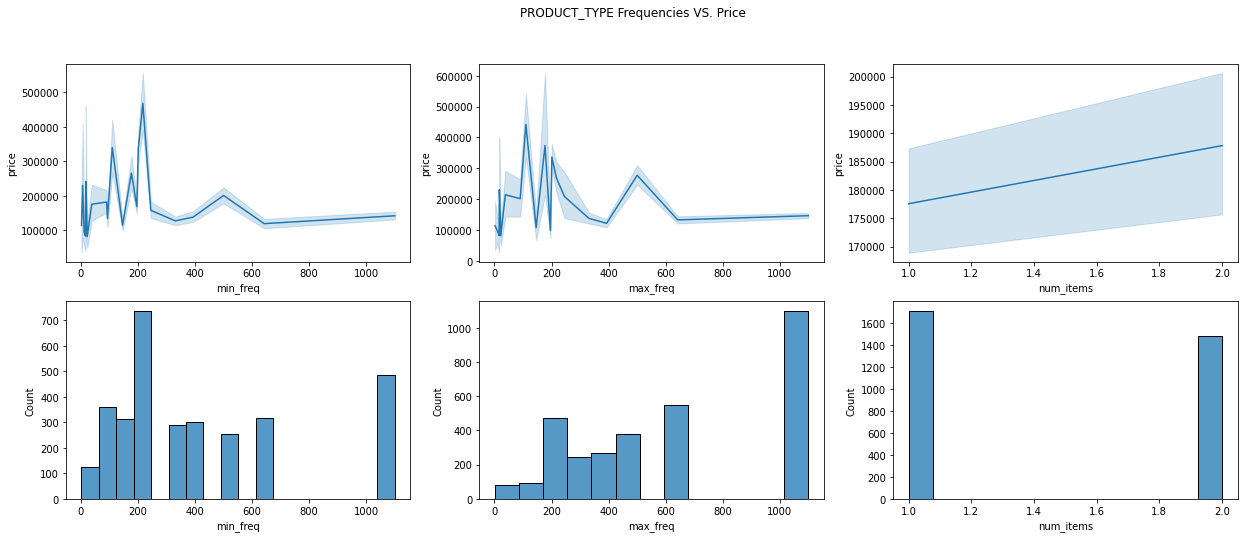

In [37]:
freq_trf.fit(df['product_type'])
freq_trf.plot_freq_price(df['product_type'], df['price'])

The 5 most frequent items in product_type are:
D    1100
H     642
A     500
U     393
N     331


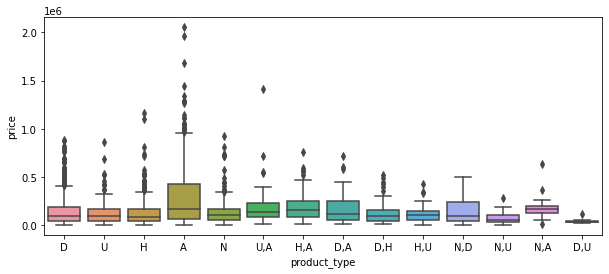

In [38]:
freq_trf.plot_top_freq(df['product_type'], df['price'])

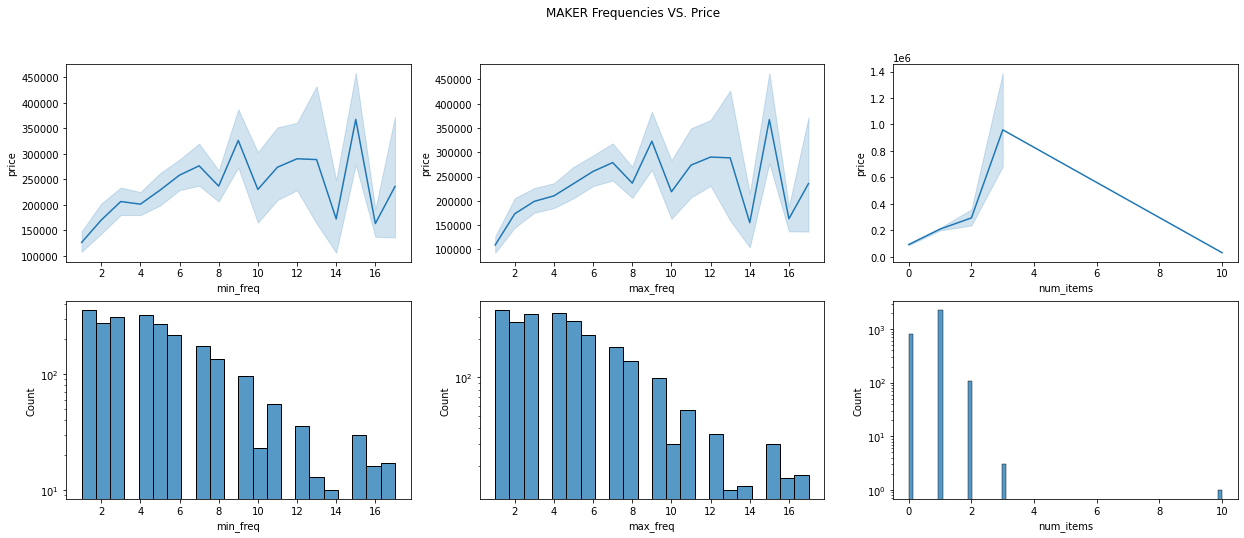

In [16]:
freq_trf.fit(df['maker'])
freq_trf.plot_freq_price(df['maker'], df['price'], hist_options={'log_scale':(False,True)})

The 5 most frequent items in maker are:
M14196    17
M14346    16
M14170    15
M14163    15
M14565    14


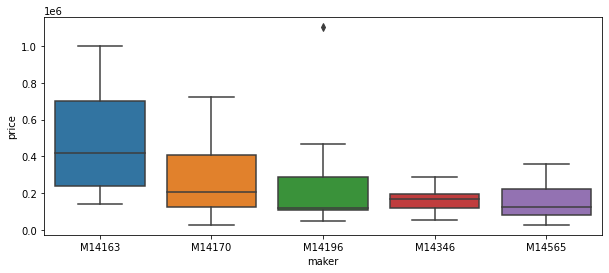

In [40]:
freq_trf.plot_top_freq(df['maker'], df['price'])

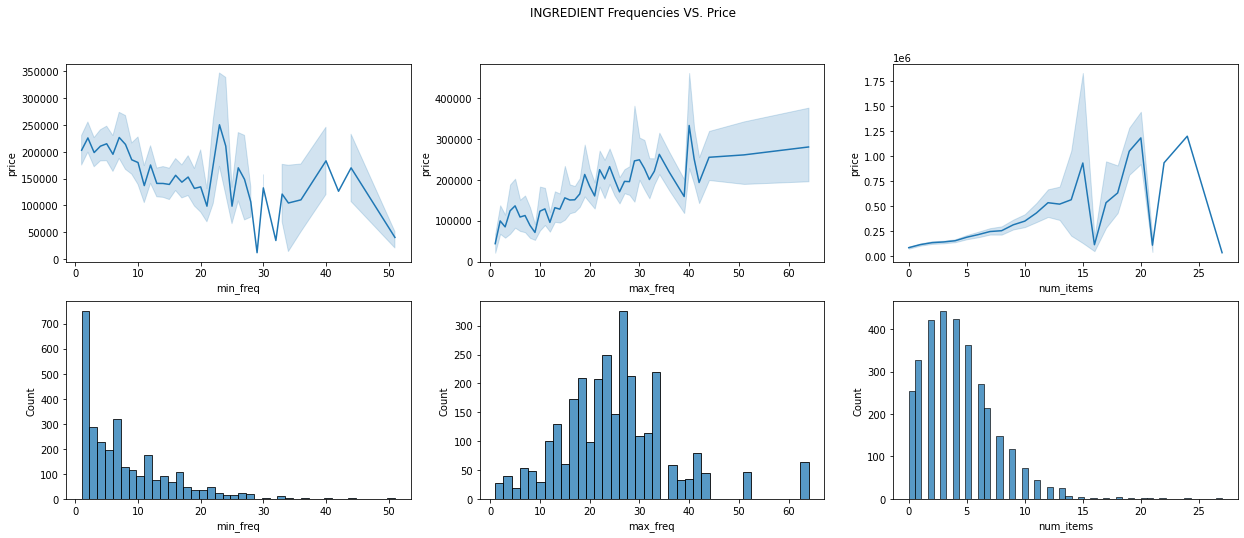

In [47]:
freq_trf.fit(df['ingredient'])
freq_trf.plot_freq_price(df['ingredient'], df['price'])

The 5 most frequent items in ingredient are:
IN732658    64
IN732094    51
IN732489    44
IN732074    42
IN732583    41


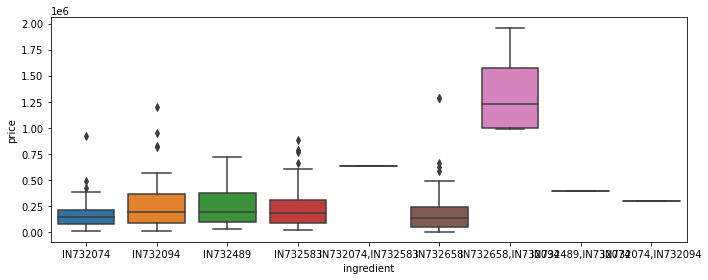

In [51]:
freq_trf.plot_top_freq(df['ingredient'], df['price'])
plt.tight_layout()

The 5 most frequent items in product_level are:
advanced          1320
super advanced    1222
intermediate       532
basic              111
unrated              1


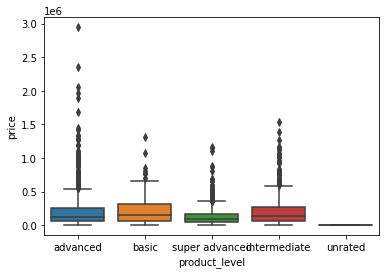

In [25]:
freq_trf.fit(df['product_level'])
freq_trf.plot_top_freq(df['product_level'], df['price'])

## Feature Selection

In [19]:
numeric_features = ['cost', 'weight', 'height', 'width', 'depth', 'purchase_date']
num_trf = Pipeline(steps=[
    ('num_selector', FeatureSelector(numeric_features)),
    ('num_trf', numeric_transformer()),
])

cat_trf = ColumnTransformer(
    [
        # ('type', freq_transformer(['min_freq', 'max_freq', 'num_items']), 'product_type'),
        # ('type', OneHotEncoder(handle_unknown='ignore'), ['product_type']),
        ('type', dummy_transformer(), 'product_type'),
        ('maker', freq_transformer(['min_freq', 'num_items']), 'maker'),
        ('ingredient', freq_transformer(['min_freq', 'max_freq', 'var_freq', 'num_items']), 'ingredient'),
        # ('level', OneHotEncoder(handle_unknown='ignore'), ['product_level'])
        ('level', ordinal_transformer(), 'product_level')
    ],
    remainder='drop'
)


feature_trf = FeatureUnion([
    ('num_trf', num_trf),
    ('cat_trf', cat_trf)
])

# Building Model

## Preparing Data

In [18]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

***Analyze Principal Components***

In [30]:
feat_red = Pipeline(steps=[
    ('impute', KNNImputer()),
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures()),
    ('pca', PCA(random_state=42))
])

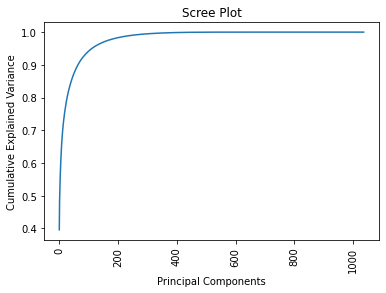

In [31]:
X_train_sel = feat_red.fit_transform(X_train_trf)
plot_pca_scree(feat_red[3])

In [21]:
def model_building(imputer=KNNImputer,poly=False,scaler=RobustScaler,pca=False,reg=XGBRegressor):
    steps = [
        ('feature_trf', feature_trf),
        ('imputer', imputer()),
    ]
    
    if poly:
        steps.append(('poly', PolynomialFeatures()))
    
    if scaler:
        steps.append(('scaler', scaler()))
    
    if pca:
        steps.append(('pca', PCA(n_components='mle')))
    
    steps.append(('reg', reg()))
    return Pipeline(steps)

## Training

### Linear Regression

In [12]:
lr = model_building(imputer=KNNImputer, poly=True, scaler=RobustScaler, pca=True, reg=LinearRegression)

In [13]:
lr_params = {
    'imputer__n_neighbors': [3, 5, 10, 20]
#     'poly__degree': [1, 2]
}

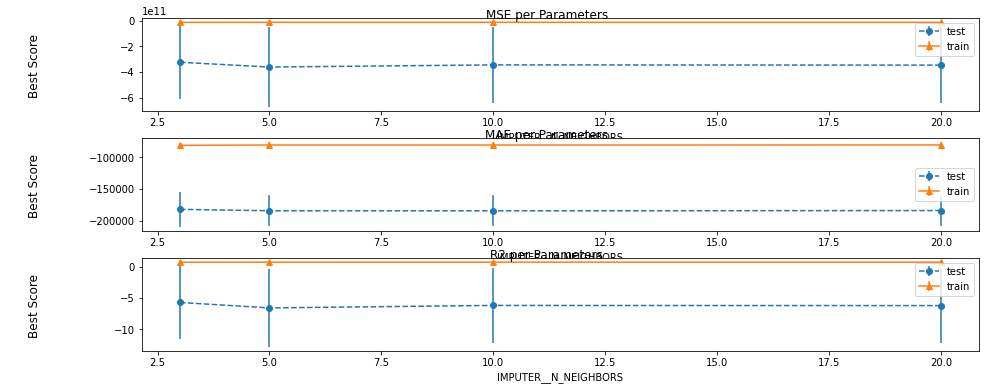

In [14]:
gs = model_tuning(lr, lr_params, X_train, y_train)
plot_search_results(gs)

### Tree-Based Regression

In [22]:
tr = model_building(imputer=KNNImputer, poly=False, scaler=False, pca=False, reg=XGBRegressor)

In [41]:
tr_params = {
    'imputer__n_neighbors': [15], # round 1
    
    'reg__n_estimators': [300], # round 2
    
    'reg__max_depth': [3], # round 3
    'reg__min_child_weight': [7],
    
    'reg__colsample_bytree': [0.8], # round 4
    'reg__subsample': [1],
    
    'reg__gamma': [0], # round 5
    
    'reg__reg_alpha': [6], # round 6
    'reg__reg_lambda': [7],
    
    'reg__learning_rate': [0.05] # round 7
}

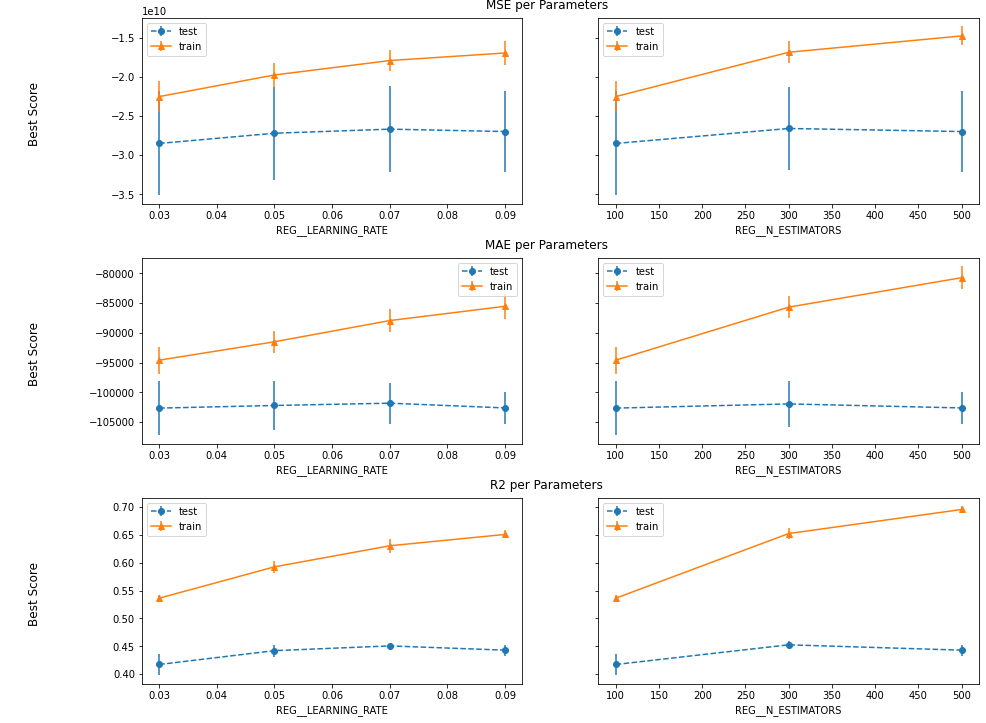

In [42]:
tgs = model_tuning(tr, tr_params, X_train, y_train)
plot_search_results(tgs)

In [23]:
tr_param = {
    'imputer__n_neighbors': 15,
    'reg__n_estimators': 300,
    'reg__max_depth': 3,
    'reg__min_child_weight': 7,
    'reg__colsample_bytree': 0.8,
    'reg__subsample': 1,
    'reg__gamma': 0,
    'reg__reg_alpha': 6,
    'reg__reg_lambda': 7,
    'reg__learning_rate': 0.05
}
tr.set_params(**tr_param)
tr.fit(X_train, y_train)
y_pred_train = tr.predict(X_train)
y_pred_test = tr.predict(X_test)

model_loss(y_train, y_pred_train, 'train')
model_loss(y_test, y_pred_test, 'test')

train MAE: 8.42e+04
train MSE: 1.65e+10
train R2: 0.661
test MAE: 1.01e+05
test MSE: 2.40e+10
test R2: 0.504


***Observations*** 
1. Tree-based regression performs much better than linear regression.
2. After hyperparmeter tuning, the average absolute error of predicted price is around $100,000 for test set.

# Conclusions

## About the Model

In [27]:
feature_names = tr[0].transformer_list[0][1][1].get_feature_names() + \
                        tr[0].transformer_list[1][1].get_feature_names()

Text(0.5, 1.0, 'Feature Importance')

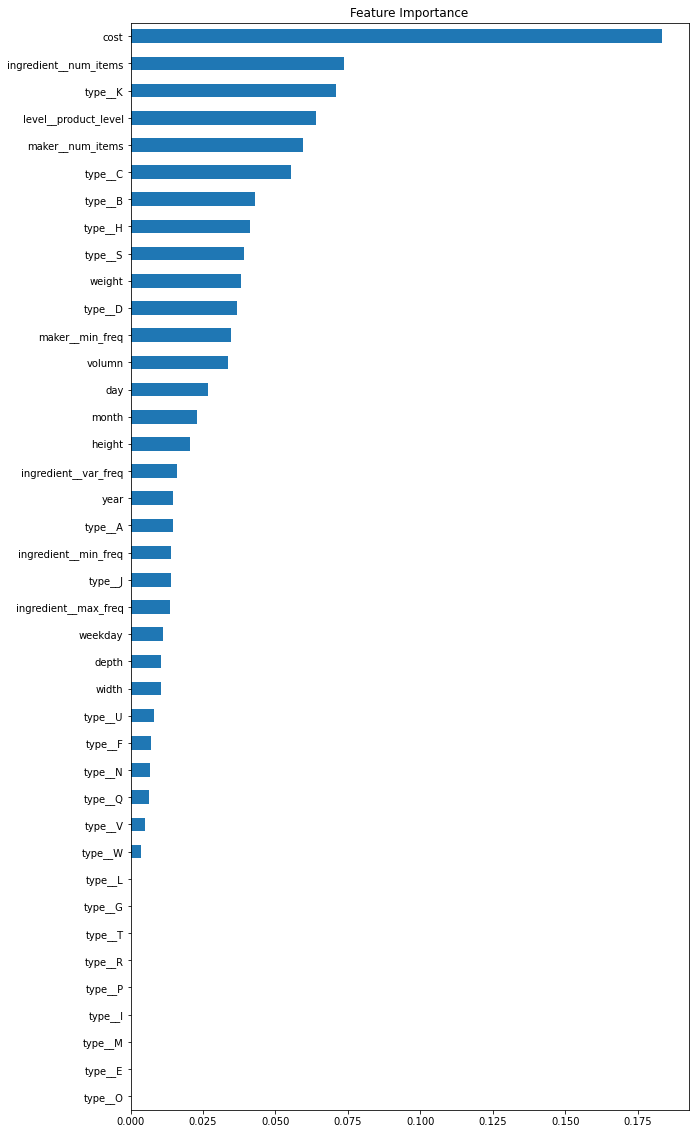

In [28]:
feat_imp = pd.Series(tr[2].feature_importances_, index=feature_names).sort_values(ascending=True)
feat_imp.plot(kind='barh', figsize=(10, 20))
plt.xticks(rotation=0)
plt.title('Feature Importance')

***Observations***  
1. Cost plays a primary role of predicting price.
2. Product level and some product types are important in predicting price.
3. Number of ingredients and number of makers play are also important in predicting price.

## About the Code

## Limitations to be Improved

* The price variation is extremely huge, and cannot be fully explained by the current features. We may omit some important features, such as the demand.